In [4]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from citipy import citipy

In [5]:
# Create a set of random latitude and longitude combos
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs
# zip() function packs the input into a zip object in memory, essentially taking up less memory
# in this case, it packs each pair to the same index in the generated array into a tuple, so 1500 pairs of lat and long
# can only unzip a zipped tuple once before it is removed from comp mem

In [6]:
# Add lats and longs to a list
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each lat and long combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique then we add to cities list
    if city not in cities:
        cities.append(city)

# Print city count to confirm number
len(cities)

643

In [22]:
cities

['ushuaia',
 'tambul',
 'rikitea',
 'taolanaro',
 'waipawa',
 'cherskiy',
 'bredasdorp',
 'port alfred',
 'illoqqortoormiut',
 'nikolskoye',
 'san pedro',
 'kununurra',
 'newcastle',
 'mataura',
 'khani',
 'rognan',
 'puerto cabello',
 'qaanaaq',
 'east london',
 'hofn',
 'honningsvag',
 'chokurdakh',
 'mys shmidta',
 'albany',
 'livingstonia',
 'hithadhoo',
 'kulhudhuffushi',
 'longyearbyen',
 'kardla',
 'beloha',
 'zachagansk',
 'hami',
 'cape town',
 'karratha',
 'busselton',
 'kodiak',
 'hilo',
 'kuching',
 'banmo',
 'vaini',
 'sentyabrskiy',
 'bluff',
 'adamas',
 'avarua',
 'kiunga',
 'pevek',
 'torbay',
 'port hardy',
 'mastic beach',
 'tsihombe',
 'margate',
 'castro',
 'cabo san lucas',
 'salalah',
 'akhinos',
 'upernavik',
 'tuktoyaktuk',
 'hermanus',
 'bantry',
 'taoudenni',
 'bratsk',
 'tigil',
 'monticello',
 'new norfolk',
 'sao joao da barra',
 'saint-georges',
 'punta arenas',
 'waddan',
 'ketchikan',
 'atuona',
 'jamestown',
 'comodoro rivadavia',
 'vostok',
 'tevaitoa'

# Pulling Data for Cities with API

In [25]:
# Import requests and weather_api_key
import requests as req
from config import weather_api_key

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [26]:
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&lat={lat}&lon={lon}&appid=" + weather_api_key

In [27]:
# Declare empty list to hold weather data for each city
city_data = []

# Print the begining of the logging
print("Beggining Data Retrieval     ")
print("-----------------------------")

# Create counters to iterated the logging for each recorded response and the set to start at 1
record_count = 1
set_count = 1

Beggining Data Retrieval     
-----------------------------


In [28]:
# loop through all the cities in our list
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each City
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the url, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve the data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print(f"{city} not found, skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | tambul
tambul not found, skipping...
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | taolanaro
taolanaro not found, skipping...
Processing Record 5 of Set 1 | waipawa
Processing Record 6 of Set 1 | cherskiy
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | illoqqortoormiut
illoqqortoormiut not found, skipping...
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | san pedro
Processing Record 12 of Set 1 | kununurra
Processing Record 13 of Set 1 | newcastle
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | khani
Processing Record 16 of Set 1 | rognan
Processing Record 17 of Set 1 | puerto cabello
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | hofn
Processing Record 21 of Set 1 | honningsvag
Processing Record 22 of Set 1 

Processing Record 34 of Set 4 | parabel
Processing Record 35 of Set 4 | tessalit
Processing Record 36 of Set 4 | meulaboh
Processing Record 37 of Set 4 | kojori
Processing Record 38 of Set 4 | newport
Processing Record 39 of Set 4 | dutse
Processing Record 40 of Set 4 | seoul
Processing Record 41 of Set 4 | lavrentiya
Processing Record 42 of Set 4 | ewa beach
Processing Record 43 of Set 4 | gurupi
Processing Record 44 of Set 4 | saskylakh
Processing Record 45 of Set 4 | arraial do cabo
Processing Record 46 of Set 4 | saint-francois
Processing Record 47 of Set 4 | port blair
Processing Record 48 of Set 4 | ixtapa
Processing Record 49 of Set 4 | great yarmouth
Processing Record 50 of Set 4 | mareeba
Processing Record 1 of Set 5 | port macquarie
Processing Record 2 of Set 5 | nosy varika
Processing Record 3 of Set 5 | binzhou
Processing Record 4 of Set 5 | lata
Processing Record 5 of Set 5 | louisbourg
louisbourg not found, skipping...
Processing Record 6 of Set 5 | okhotsk
Processing Rec

Processing Record 19 of Set 8 | tafalla
Processing Record 20 of Set 8 | omboue
Processing Record 21 of Set 8 | sri aman
Processing Record 22 of Set 8 | ribeira grande
Processing Record 23 of Set 8 | mayo
Processing Record 24 of Set 8 | caravelas
Processing Record 25 of Set 8 | sur
Processing Record 26 of Set 8 | auki
Processing Record 27 of Set 8 | vermilion
Processing Record 28 of Set 8 | gornyak
Processing Record 29 of Set 8 | flinders
Processing Record 30 of Set 8 | navrongo
Processing Record 31 of Set 8 | muli
Processing Record 32 of Set 8 | suure-jaani
Processing Record 33 of Set 8 | jinchang
Processing Record 34 of Set 8 | castel volturno
Processing Record 35 of Set 8 | morgaushi
Processing Record 36 of Set 8 | nchelenge
Processing Record 37 of Set 8 | jacareacanga
Processing Record 38 of Set 8 | floriano
Processing Record 39 of Set 8 | utiroa
utiroa not found, skipping...
Processing Record 40 of Set 8 | saint-joseph
Processing Record 41 of Set 8 | jishou
Processing Record 42 of 

Processing Record 5 of Set 12 | faanui
Processing Record 6 of Set 12 | luau
Processing Record 7 of Set 12 | juazeiro
Processing Record 8 of Set 12 | oranjemund
Processing Record 9 of Set 12 | taltal
Processing Record 10 of Set 12 | provideniya
Processing Record 11 of Set 12 | abha
Processing Record 12 of Set 12 | zwedru
Processing Record 13 of Set 12 | maple creek
Processing Record 14 of Set 12 | esna
Processing Record 15 of Set 12 | saratovskaya
Processing Record 16 of Set 12 | nechi
Processing Record 17 of Set 12 | artyk
artyk not found, skipping...
Processing Record 18 of Set 12 | blagoveshchenka
Processing Record 19 of Set 12 | sandy bay
Processing Record 20 of Set 12 | thinadhoo
Processing Record 21 of Set 12 | goundi
Processing Record 22 of Set 12 | maharajganj
Processing Record 23 of Set 12 | soyo
Processing Record 24 of Set 12 | kangasala
Processing Record 25 of Set 12 | lorengau
Processing Record 26 of Set 12 | champerico
Processing Record 27 of Set 12 | nenjiang
Processing Re

In [29]:
# Confirm if the count of data is sufficient for our purposes >=500
len(city_data)

586

In [30]:
# Convert the array of dictionaries to a Pandas Dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,42.46,87,75,32.21,AR,2022-04-12 18:23:42
1,Rikitea,-23.1203,-134.9692,79.00,69,44,18.14,PF,2022-04-12 18:28:00
2,Waipawa,-41.4122,175.5153,53.74,85,100,12.80,NZ,2022-04-12 18:28:01
3,Cherskiy,68.7500,161.3000,-13.32,93,77,1.59,RU,2022-04-12 18:28:01
4,Bredasdorp,-34.5322,20.0403,67.64,76,49,3.09,ZA,2022-04-12 18:28:02


In [31]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df [new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-04-12 18:23:42,-54.8000,-68.3000,42.46,87,75,32.21
1,Rikitea,PF,2022-04-12 18:28:00,-23.1203,-134.9692,79.00,69,44,18.14
2,Waipawa,NZ,2022-04-12 18:28:01,-41.4122,175.5153,53.74,85,100,12.80
3,Cherskiy,RU,2022-04-12 18:28:01,68.7500,161.3000,-13.32,93,77,1.59
4,Bredasdorp,ZA,2022-04-12 18:28:02,-34.5322,20.0403,67.64,76,49,3.09


In [32]:
# Create an output file (CSV) to hold city_data in CSV\
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plotting Data for Stem Junior High Students

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [36]:
# Get today's date in seconds.
today = time.time()
today

1649790918.5513

In [37]:
# Convert time 
today = time.strftime('%x')
today

'04/12/22'

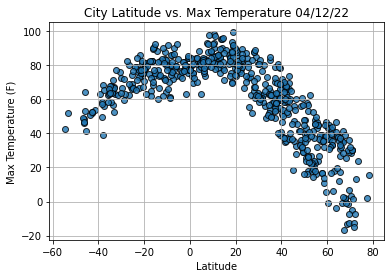

In [38]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

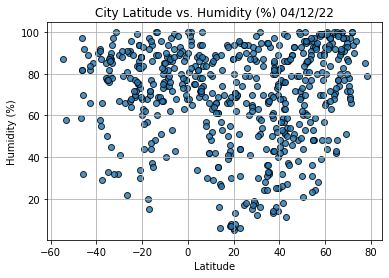

In [41]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

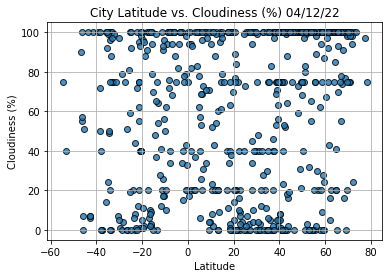

In [42]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

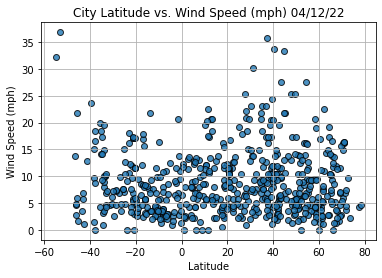

In [43]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()